In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [3]:
# https://www.kaggle.com/datasets/oddrationale/mnist-in-csv/data?select=mnist_train.csv
# 60k training images from MNIST dataset
d0 = pd.read_csv(r"C:\Users\fenel\Documents\projects\mnist\mnist_train.csv")
print(d0.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [4]:
# save the labels into a variable labels
labels_train = d0['label']

#drop the label feature and store the pixel data in variable data
data_train = d0.drop("label",axis=1)

In [5]:
# check the shape of the features and labels
print(data_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [5]:
# https://www.kaggle.com/datasets/oddrationale/mnist-in-csv/data?select=mnist_test.csv
# 10k test images from MNIST dataset
d1 = pd.read_csv('./mnist/mnist_test.csv')
print(d1.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [6]:
# save the labels into a variable labels
labels_test = d1['label']

#drop the label feature and store the pixel data in variable data
data_test = d1.drop("label",axis=1)

In [7]:
# check the shape of the features and labels
print(data_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


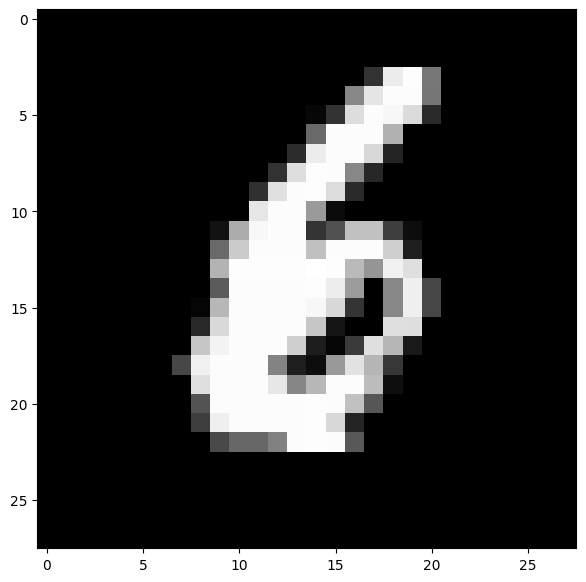

6


In [10]:
# display or plot a number
plt.figure(figsize=(7,7))
idx = 129
grid_data = data_train.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(labels_train[idx])

In [9]:
# Data Preprocessing Standardize the data
scaler = StandardScaler()
standardised_data_train = StandardScaler().fit_transform(data_train)
print(standardised_data_train.shape)
standardised_data_test = StandardScaler().fit_transform(data_test)
print(standardised_data_test.shape)

(60000, 784)
(10000, 784)


Visualization of PCA in 2D plot

In [10]:
# Apply PCA for Dimensionality Reduction
# converting it to 2d for plotting
n_components = 2  # Number of components to reduce to
pca = PCA(n_components=n_components)
train_pca = pca.fit_transform(standardised_data_train)  # Fit and transform on the training set
print(train_pca.shape)

(60000, 2)


In [11]:
pca_data = np.vstack((train_pca.T, labels_train)).T

# creating a new data frame for ploting the labeled points.
pca_df = pd.DataFrame(data = pca_data, columns = ('1st_principal', '2nd_principal', 'label'))
print(pca_df.head())

   1st_principal  2nd_principal  label
0      -0.922159      -4.814790    5.0
1       8.708977      -7.754403    0.0
2       2.328389       9.431338    4.0
3      -6.582173      -3.746318    1.0
4      -5.183251       3.133297    9.0


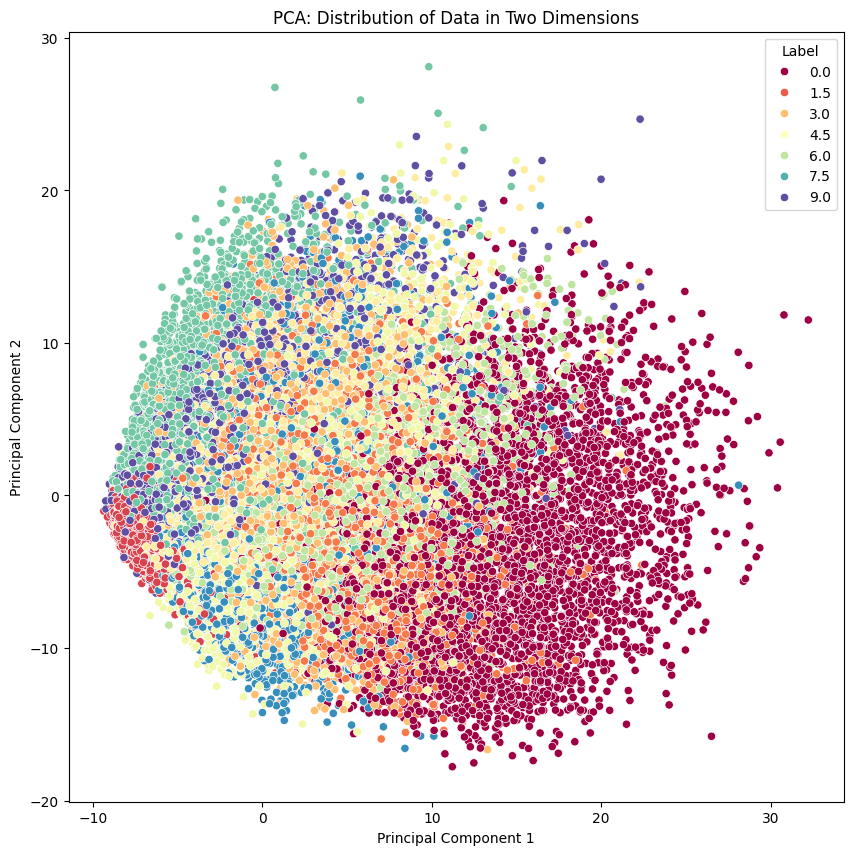

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=pca_df, x="1st_principal", y="2nd_principal", hue='label',  palette='Spectral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Distribution of Data in Two Dimensions')
plt.legend(title='Label')
plt.show()

Number of PCA components for 93% variance

In [13]:
train_pca = pca.fit_transform(standardised_data_train)  # Fit and transform on the training set
test_pca = pca.transform(standardised_data_test)  # Transform the test set

In [14]:
# Calculate the explained variance ratio for all components
pca_full = PCA().fit(standardised_data_train)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

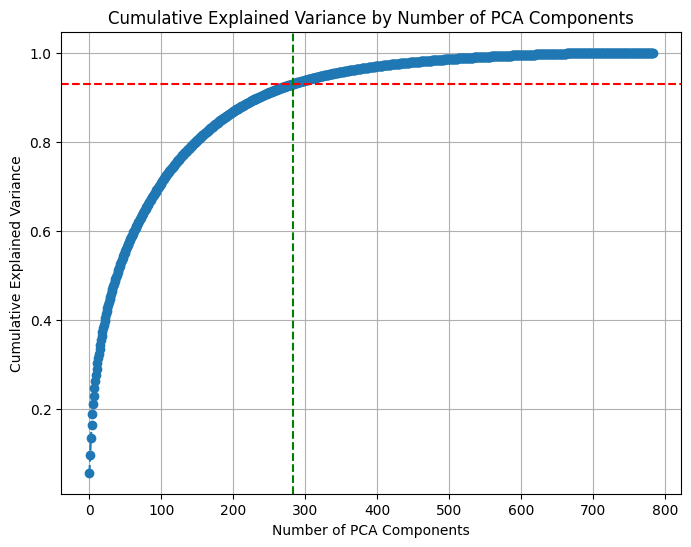

In [15]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.93, color='r', linestyle='--')  # 93% threshold line
plt.axvline(x=np.argmax(cumulative_variance >= 0.93), color='g', linestyle='--')  # Mark 93% point
plt.grid(True)
plt.show()

In [16]:
# Print the number of components needed for 93% variance
n_components_93 = np.argmax(cumulative_variance >= 0.93) + 1  # python indexing starts at 0
print(f'Number of components to retain 93% variance without KNN: {n_components_93}')

Number of components to retain 93% variance without KNN: 284


Optimal number of k nearest neighbour

In [17]:
pca = PCA(n_components=0.93)  # Retain 93% of variance
train_pca = pca.fit_transform(standardised_data_train)  # Fit and transform on the training set

In [18]:
# Range of k values to test
k_values = range(1, 20)
cross_val_scores = []

In [19]:
# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_pca, labels_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cross_val_scores.append(scores.mean())

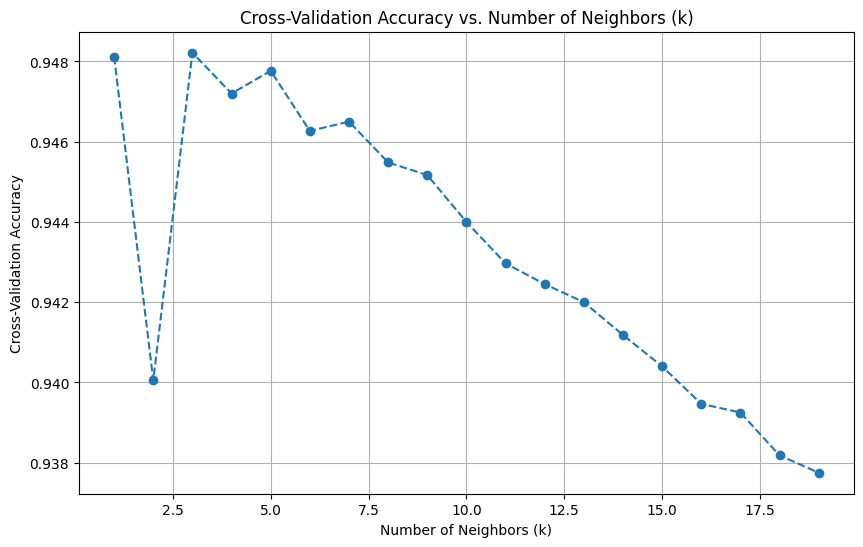

In [20]:
# Plot the cross-validation results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o', linestyle='--')
plt.title('Cross-Validation Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

In [21]:
# Print the best k
optimal_k = k_values[np.argmax(cross_val_scores)]
print(f'The optimal number of neighbors (k) is: {optimal_k}')

The optimal number of neighbors (k) is: 3


Evaluation of classification accuracy and error rates

In [22]:
# List to store accuracies for different n_components
components_range = range(10, 783, 10) 
accuracy_scores = []
error_rates = []

In [23]:
for n_components in components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    train_pca = pca.fit_transform(standardised_data_train)  # Fit and transform on the training set
    test_pca = pca.transform(standardised_data_test)
    
    # Train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=optimal_k) #using best k
    knn.fit(train_pca, labels_train)
    
    # Predict on the test set and compute accuracy
    labels_pred = knn.predict(test_pca)
    accuracy = accuracy_score(labels_test, labels_pred)
    accuracy_scores.append(accuracy)
    error_rate = 1 - accuracy  # Error rate is 1 - accuracy
    error_rates.append(error_rate)

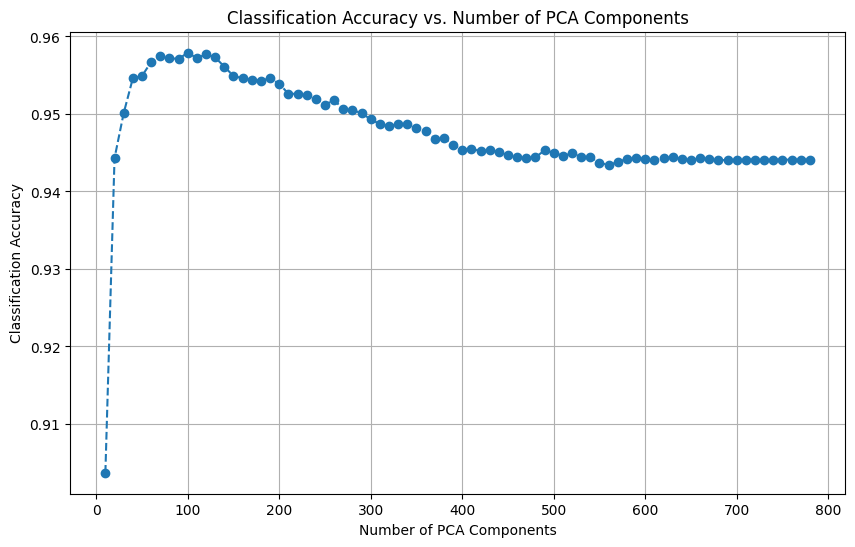

Using 3


In [24]:
# Plot accuracy as a function of the number of components
plt.figure(figsize=(10, 6))
plt.plot(components_range, accuracy_scores, marker='o', linestyle='--')
plt.title('Classification Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Classification Accuracy')
plt.grid(True)
plt.show()
print(f'Using {optimal_k}')

In [25]:
# Find the maximum accuracy and the number of components that achieved it
best_accuracy = max(accuracy_scores)
best_n_components = components_range[np.argmax(accuracy_scores)]

# Print the best classification accuracy and the corresponding number of components
print(f'Best classification accuracy: {best_accuracy:.4f}')
print(f'Number of PCA components for best accuracy: {best_n_components}')

Best classification accuracy: 0.9579
Number of PCA components for best accuracy: 100


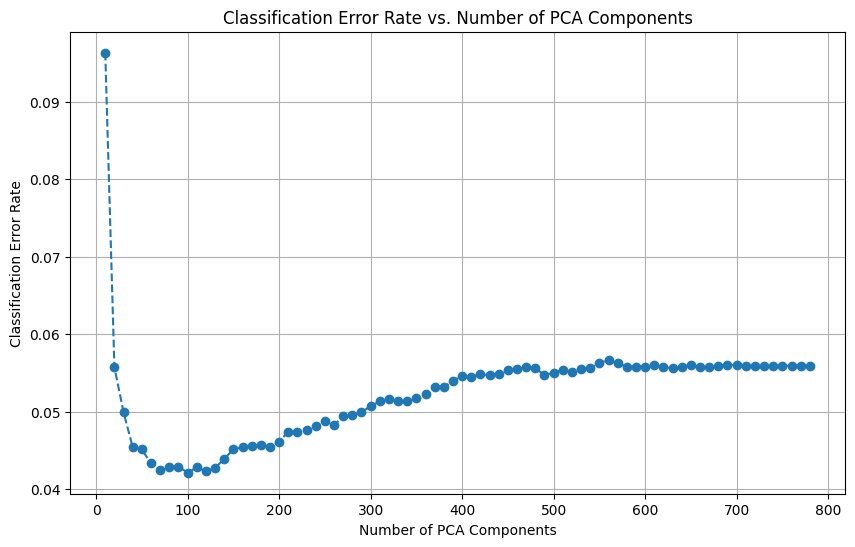

Using 3


In [26]:
# Plot error rate as a function of the number of components
plt.figure(figsize=(10, 6))
plt.plot(components_range, error_rates, marker='o', linestyle='--')
plt.title('Classification Error Rate vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Classification Error Rate')
plt.grid(True)
plt.show()
print(f'Using {optimal_k}')

In [27]:
# Find the maximum accuracy and the number of components that achieved it
lowest_error = max(error_rates)
best_n_components = components_range[np.argmin(error_rates)]

# Print the best classification accuracy and the corresponding number of components
print(f'Lowest classification error: {lowest_error:.4f}')
print(f'Number of PCA components for best accuracy: {best_n_components}')

Lowest classification error: 0.0963
Number of PCA components for best accuracy: 100
